In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import time
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
x = pd.read_csv('x-data.csv')
y = pd.read_csv('Y-data.csv')

In [3]:
x.head()

,duration,Plength,Mlength,HoP,Sno,Sindex,land,Tmode,Neighbors,Hflow,...,Failed Rate,AODV,ICMP,UDP,labels,Unkown MsgType,Route Error,Route Reply,Route Reply Acknowledgment,Route Request
0,0.004359,92,28,-1,6,2486,2,0,13,6354,...,62.632165,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0
1,0.001493,92,20,-1,13,2994,2,0,16,7097,...,59.647133,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0
2,0.001059,92,28,-1,15,2037,2,0,13,6398,...,62.595632,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0
3,0.000050,76,20,-1,5,937,2,1,15,6634,...,61.499429,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0
4,0.001158,92,20,-1,3,707,2,0,15,6634,...,61.499429,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0


In [4]:
y.head()

,Label
0,0
1,0
2,0
3,1
4,0


In [5]:
X = x.iloc[:, :].values
Y = y.iloc[:, :].values
X.shape

(637862, 24)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [7]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
X_test.shape

(127573, 24)

In [10]:
clf = SVC(gamma='auto')

In [11]:
s = time.time()
clf.fit(X_train, Y_train)
e = time.time()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1441.2989065647125


In [20]:
print(str((e-s)/60)+" min")

24.02164844274521 min


In [12]:
Y_predict = clf.predict(X_test)
cm = np.array(confusion_matrix(Y_test, Y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index = ['attack', 'normal'],
                        columns = ['pred_attack','pred_normal'])
confusion

,pred_attack,pred_normal
attack,95428,1677
normal,208,30260


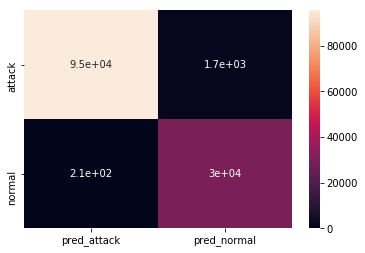

In [13]:
sns.heatmap(confusion, annot = True)

In [14]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     97105
           1       0.95      0.99      0.97     30468

   micro avg       0.99      0.99      0.99    127573
   macro avg       0.97      0.99      0.98    127573
weighted avg       0.99      0.99      0.99    127573



In [150]:
accuracy_score(Y_test, Y_predict)

0.9876833333333334